In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", names=["label", "message"])
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})
df.shape, df['label'].value_counts()


((5572, 3),
 label
 ham     4825
 spam     747
 Name: count, dtype: int64)

In [5]:
X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [7]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [8]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9885139985642498

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



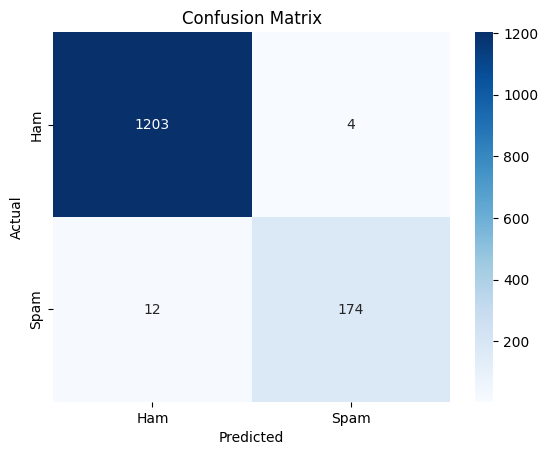

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
def predict_message(msg):
    vec = vectorizer.transform([msg])
    result = model.predict(vec)[0]
    return "Spam" if result == 1 else "Ham"

# Try a few samples
print(predict_message("Congratulations! You've won a free iPhone"))
print(predict_message("Hi, are we meeting tomorrow?"))


Spam
Ham


In [13]:
print(predict_message("Congratulations! You've won a free iPhone"))

Spam


In [14]:
print(predict_message("Hi, are we meeting tomorrow?"))

Ham


In [15]:
print(predict_message("Hi, can you call me now"))

Ham


In [16]:
print(predict_message("Free Flight Ticket.. Redeem now!"))

Spam
